Name - Hitesh Choudhary

Batch - GRIPAPRIL2023

Task - Predict the percentage of an student based on the no. of study hours. 

In [1]:
# Importing Required Libarires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings   
warnings.filterwarnings('ignore')  # Ignore never display warnings which match

In [2]:
# Reading the csv(comma separated value) data
df = pd.read_csv("Hours,Scores.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


# Exploratory Data Analysis ( EDA )

In [3]:
df.shape  # Shape of the data 

(25, 2)

In [4]:
df.info()  # Informartion of data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [5]:
df.describe()  # Describing the data

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


# Data Cleaning / Preparing the data for Machine Learning Algorithm

In [6]:
df.isna().sum()  # Checking is there any null value in the data

Hours     0
Scores    0
dtype: int64

Text(0.5, 1.0, 'Scores')

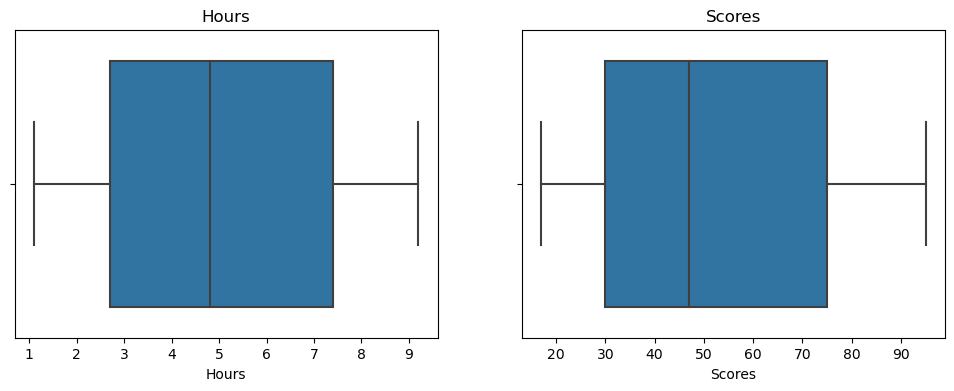

In [7]:
plt.figure(figsize = (12,4))
plt.subplot(121)
sns.boxplot(df['Hours'])
plt.title("Hours")

plt.subplot(122)
sns.boxplot(df['Scores'])
plt.title("Scores")

After Performing boxplot, we can say that Data has no outliers

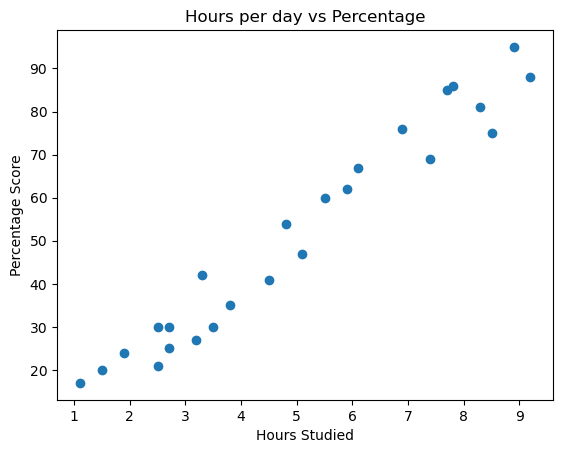

In [8]:
# Checking the correlation between the data
plt.scatter(df['Hours'], df['Scores'])  
plt.title('Hours per day vs Percentage')  
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

Hence, Data is positive correlated

# Training the data for ML process

In [9]:
x = df.iloc[:,0:1]
y = df.iloc[:,1:2]

Now that we have our attributes and labels, the next step is to split this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [10]:
from sklearn.model_selection import train_test_split # 
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, 
                                                 random_state = 2)

In [11]:
x_train  # x_train ( 80% percent of data) for training the algorithm

,Hours
9,2.7
3,8.5
16,2.5
12,4.5
22,3.8
4,3.5
10,7.7
5,1.5
19,7.4
1,5.1


In [12]:
x_test  # x_test (20 % percent of data) for testing the data

,Hours
14,1.1
0,2.5
17,1.9
6,9.2
23,6.9


### **Training the Algorithm**
We have split our data into training and testing sets, and now is finally the time to train our algorithm. 

In [13]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
x_train = x_train.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)
lr.fit(x_train, y_train)
print("Algorithm Trained")

Algorithm Trained


Formula for finding slope is, y = m * x + c  where, m = coefficient, x = data, c = intercept

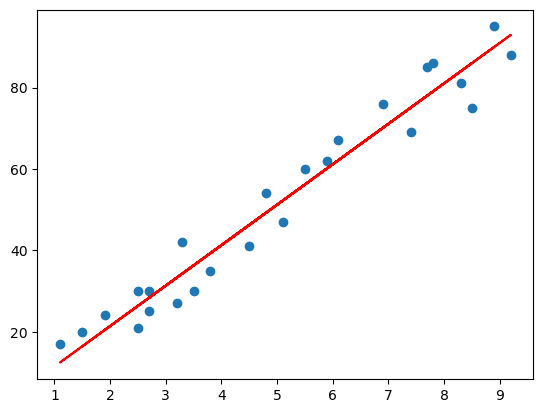

In [14]:
slope = lr.coef_ * x + lr.intercept_
# Plotting for the test data 
plt.scatter(x, y)
plt.plot(x, slope,color='r') # Plotting best fit line 
plt.show()

In [15]:
# Predicting the data 
y_test = y_test.to_numpy()
y_pred = lr.predict(x_test.values.reshape(-1,1))

In [20]:
# Creating the data frame and comparing Actual data vs Predicted data
pred_df = pd.DataFrame({"Actural":y_test.ravel(), "Predicted": y_pred.ravel()},index=range(1,6))
pred_df

,Actural,Predicted
1,17,12.442587
2,21,26.359448
3,24,20.395079
4,88,92.961570
5,76,70.098155


In [21]:
# What will be predicted score if a student studies for 9.25 hrs/ day? 
# You can also test your own data
hours = 9.25
score = lr.coef_ * hours + lr.intercept_
print("If a student studies for 9.25 hrs/ day he will score - ",score)

If a student studies for 9.25 hrs/ day he will score -  [[93.45860056]]


In [30]:
train_score = lr.score(x_train , y_train)
test_score = lr.score(x_test,y_test)
print("Train score --",train_score * 100)  # In percentage
print("Test score --",test_score * 100)  # In percentage

Train score -- 94.23348138802984
Test score -- 97.35538080811827


### **Evaluating the model**

The final step is to evaluate the performance of algorithm

We are performing 

i. Mean Absolute Error

ii. Mean Squared Error

iii. Mean Root Mean Squared Error

In [33]:
from sklearn import metrics  
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred)) 
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Mean Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 4.877039354964484
Mean Squared Error: 24.38762033985666
Mean Root Mean Squared Error: 4.938382360637607


# Conclusion
i. Successfully, Predicted the percentage of an student based on the no. of study hours.

ii. According to Linear Regression, If a student studies for 9.25 hrs/ day he will score - 93.45860056